# Initialization

## Required function, Imports

In [6]:
import filter_inversion as fi
import numpy as np
import pickle
import matplotlib.pyplot as plt
import csv
def voltage_time_figure_plot(X1, Y1, color_code, name):
    # Create figure
    figure1 = plt.figure(name)
    
    # Create axes
    axes1 = figure1.add_subplot(1, 1, 1)
    
    # Create plot
    axes1.plot(X1, Y1, linewidth=2, color=color_code)
    
    # Set ylabel
    axes1.set_ylabel('Voltage (mV)', fontsize=16.5)
    
    # Set xlabel
    axes1.set_xlabel('Time (s)', fontsize=16.5)
    
    # Set title
    axes1.set_title(name, fontsize=16.5)
    
    # Set x-axis limit
    # axes1.set_xlim([0, 0.000001])
    
    # Uncomment the following line to set y-axis limit
    # axes1.set_ylim([-60, 60])
    
    # Uncomment the following line to set z-axis limit
    # axes1.set_zlim([-1, 1])
    
    axes1.grid(True)
    axes1.set_axisbelow(True)
    axes1.tick_params(labelsize=15)
    
    # Show the plot
    plt.show()

def set_mean(input_array):
    return np.mean(input_array, axis=0)
def set_offset(input_array, adjust):
    return np.array(input_array) - input_array[0] * adjust
def set_gain(input_array, adjust):
    gain = np.max(input_array[1]) * adjust
    return np.array(input_array[1]) / gain

def read_filter_coef_csv():
    IIR_coef = []
    with open("IIR.csv") as csvfile:
        for row in csv.reader(csvfile):
            for coef in row:
                IIR_coef.append(float(coef))
    return IIR_coef

In [5]:
pwd

'E:\\OP\\Experiments\\0609_predistortion\\tools'

## Load full waveform

In [7]:
X,Y =  pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/retest_500smooth_BareAWG.pkl","rb"))

waveform = [X[0],set_mean(Y)]
waveform[0] = waveform[0]*10**(6)
waveform[1] = set_gain(waveform, 1)

waveform_record = []
waveform_record.append(waveform)
%matplotlib qt
voltage_time_figure_plot(waveform[0], waveform[1], 'green', 'The original waveform')

# IIR fitting & Inverse filtering

## First Fitting & Filtering

In [9]:
"""
Select the start_time and end_time of you waveform that will be sent to the fitting process

Use the get_waveform_segment() to slice out your waveform to get the data segment
"""
start_time = 40.041
end_time = 46
waveform_segment = fi.get_waveform_segment(start_time, end_time, np.copy(waveform))
voltage_time_figure_plot(waveform_segment[0], waveform_segment[1], 'blue', 'The selected waveform segment')

In [10]:
"""
type: string
    'highpass': high-pass model fitting;
    'lowpass': low-pass model fitting;
    'line': linear model fitting;
    'skin': skin effect model fitting;
"""
type = 'highpass'
fs = 1 / (waveform[0][1] - waveform[0][0])
time_offset = start_time
amp_offset = 0.9852
coef_B = 1- amp_offset
coef_tau = 1e-2
param = [type, fs, coef_B, coef_tau, time_offset, amp_offset]

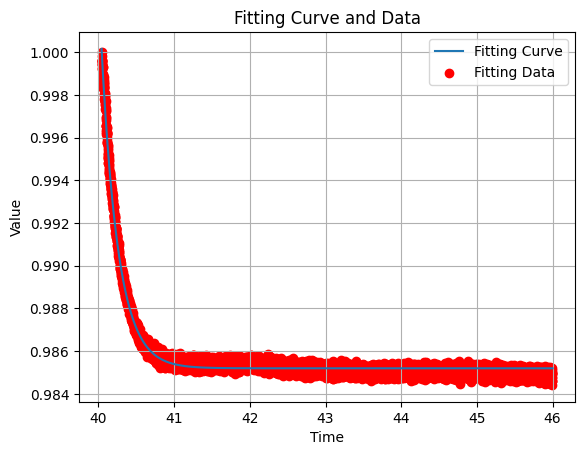

In [11]:
%matplotlib inline
waveform_pred_1st = fi.predistor(np.copy(waveform), np.copy(waveform_segment), param)
# waveform_record.append(waveform_pred_1st)

%matplotlib qt
voltage_time_figure_plot(waveform_pred_1st[0], waveform_pred_1st[1], 'green', 'Predistorted waveform')

IIR_coef = read_filter_coef_csv()
pickle.dump(IIR_coef , open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_1st.pkl" , "wb"))

In [37]:
# [a0, b0, a1, b1]
pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_1st.pkl", "rb"))

[1.0, 0.9998825170154415, 0.9955657053518472, -0.9953816089275884]

## Second Fitting & Filtering

In [12]:
"""
Select the start_time and end_time of you waveform that will be sent to the fitting process

Use the get_waveform_segment() to slice out your waveform to get the data segment
"""
start_time = 46.43
end_time = 80
waveform_segment = fi.get_waveform_segment(start_time, end_time, np.copy(waveform_pred_1st))

%matplotlib qt
voltage_time_figure_plot(waveform_segment[0], waveform_segment[1], 'blue', 'The selected waveform segment')

In [16]:
"""
type: string
    'highpass': high-pass model fitting;
    'lowpass': low-pass model fitting;
    'line': linear model fitting;
    'skin': skin effect model fitting;
"""
type = 'highpass'
fs = 1 / (waveform[0][1] - waveform[0][0])
time_offset = start_time
amp_offset = 0.99
coef_B = 0.9995- amp_offset
coef_tau = 1e-1
param = [type, fs, coef_B, coef_tau, time_offset, amp_offset]

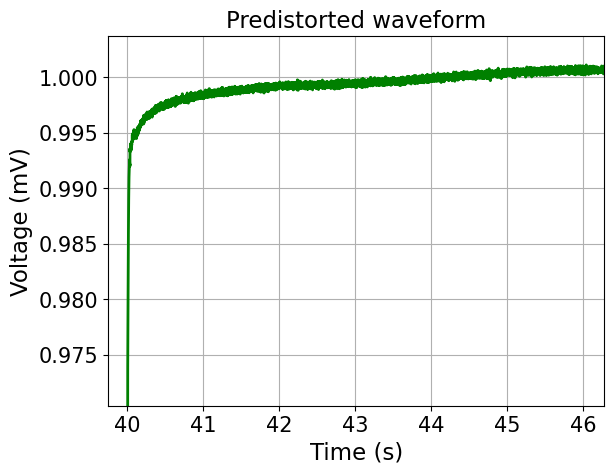

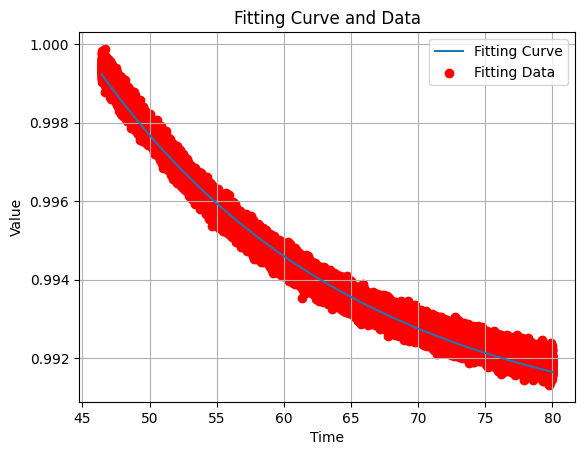

In [17]:
%matplotlib inline
waveform_pred_2nd = fi.predistor(np.copy(waveform_pred_1st), np.copy(waveform_segment), param)
# waveform_record.append(waveform_pred_2nd)

%matplotlib qt
voltage_time_figure_plot(waveform_pred_2nd[0], waveform_pred_2nd[1], 'green', 'Predistorted waveform')

IIR_coef = read_filter_coef_csv()
pickle.dump(IIR_coef , open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_2nd.pkl" , "wb"))

In [38]:
# [a0, b0, a1, b1]
pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_2nd.pkl", "rb"))

[1.0, 1.0007647885442597, 0.9999490640599166, -1.0007133380997306]

In [3]:
np.array( [1.0, 1.0007647885442597, 0.9999490640599166, -1.0007133380997306])  - np.array([1,1,1,-1])

array([ 0.00000000e+00,  7.64788544e-04, -5.09359401e-05, -7.13338100e-04])

## Third Fitting & Filtering

In [15]:
"""
Select the start_time and end_time of you waveform that will be sent to the fitting process

Use the get_waveform_segment() to slice out your waveform to get the data segment
"""
start_time = 46.41
end_time = 60.99
waveform_segment = fi.get_waveform_segment(start_time, end_time, np.copy(waveform_pred_2nd))

%matplotlib qt
voltage_time_figure_plot(waveform_segment[0], waveform_segment[1], 'blue', 'The selected waveform segment')

In [27]:
"""
type: string
    'highpass': high-pass model fitting;
    'lowpass': low-pass model fitting;
    'line': linear model fitting;
    'skin': skin effect model fitting;
"""
type = 'highpass'
fs = 1 / (waveform[0][1] - waveform[0][0])
time_offset = start_time
amp_offset = 1.00005
coef_B = 1.0006- amp_offset
coef_tau = 1
param = [type, fs, coef_B, coef_tau, time_offset, amp_offset]

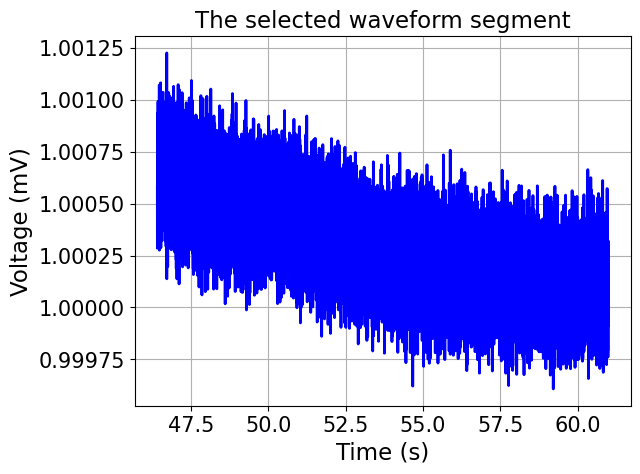

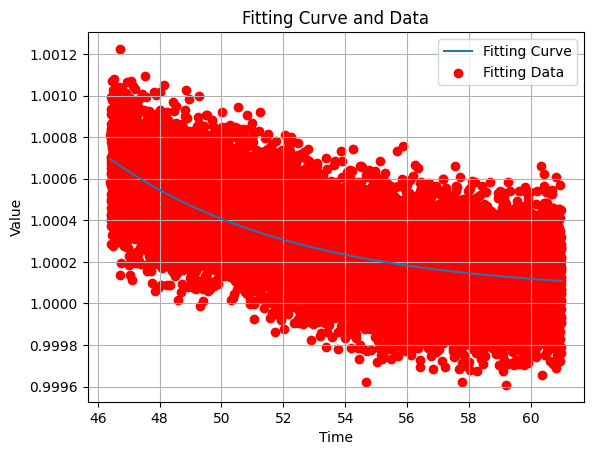

In [30]:
%matplotlib inline
waveform_pred_3rd = fi.predistor(np.copy(waveform_pred_2nd), np.copy(waveform_segment), param)
# waveform_record.append(waveform_pred_1)

%matplotlib qt
voltage_time_figure_plot(waveform_pred_3rd[0], waveform_pred_3rd[1], 'green', 'Predistorted waveform')

IIR_coef = read_filter_coef_csv()
pickle.dump(IIR_coef , open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_3rd.pkl" , "wb"))

## Fourth Fitting & Filtering

In [31]:
"""
Select the start_time and end_time of you waveform that will be sent to the fitting process

Use the get_waveform_segment() to slice out your waveform to get the data segment
"""
start_time = 40.0137
end_time = 41
waveform_segment = fi.get_waveform_segment(start_time, end_time, np.copy(waveform_pred_3rd))

%matplotlib qt
voltage_time_figure_plot(waveform_segment[0], waveform_segment[1], 'blue', 'The selected waveform segment')

In [35]:
"""
type: string
    'highpass': high-pass model fitting;
    'lowpass': low-pass model fitting;
    'line': linear model fitting;
    'skin': skin effect model fitting;
"""
type = 'skin'
fs = 1 / (waveform[0][1] - waveform[0][0])
time_offset = start_time
amp_offset = 0 # 0.9975
coef_B = 1e-3
coef_tau = None #1e-2
param = [type, fs, coef_B, coef_tau, time_offset, amp_offset]

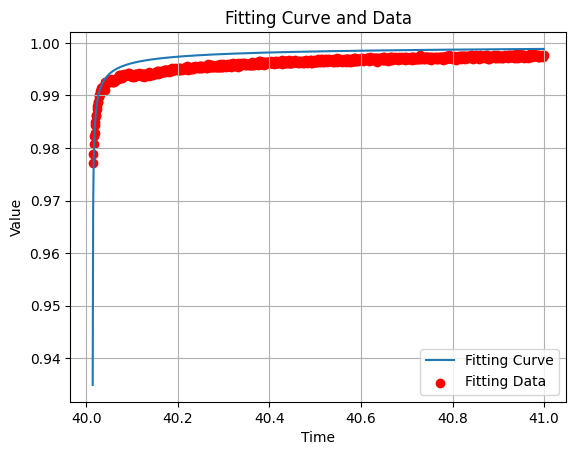

UnboundLocalError: cannot access local variable 'b0' where it is not associated with a value

In [36]:
%matplotlib inline
waveform_pred_4th = fi.predistor(np.copy(waveform_pred_3rd), np.copy(waveform_segment), param)
# waveform_record.append(waveform_pred_1)

%matplotlib qt
voltage_time_figure_plot(waveform_pred_4th[0], waveform_pred_4th[1], 'green', 'Predistorted waveform')

IIR_coef = read_filter_coef_csv()
pickle.dump(IIR_coef , open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_4th.pkl" , "wb"))

# Collection of plot

In [8]:
# X_1stPred, Y_1stPred =  pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/retest_500smooth_BareAWG_1stPred.pkl","rb"))
X_2ndPred, Y_2ndPred =  pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/retest_500smooth_BareAWG_2ndPred.pkl","rb"))
# X_bare_new, Y_bare_new =  pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/retest_500smooth_BareAWG_new.pkl","rb"))

%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X[0], np.mean(Y,axis = 0), label='Orignial ', color=  'blue')

# ax.plot(X_1stPred[0], np.mean(Y_1stPred, axis=0), label='First Predistorted', color=  'red')
# ax.plot(X_bare_new[0], np.mean(Y_bare_new, axis=0), label='Original new', color=  'red')

# ax.plot(X_2ndPred[0], np.mean(Y_2ndPred, axis = 0), label='First Predistorted', color = 'orange')

ax.grid()
    # Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Distorted vs. Filtered Waveform')

    # Legend
ax.legend()

    # Display the plot
plt.show()

array([2.0000e-05, 2.0001e-05, 2.0002e-05, ..., 9.9997e-05, 9.9998e-05,
       9.9999e-05])